### ARIMA = Auto Regressive Integrated Moving Average

In [1]:
from statsmodels.tsa.ar_model import AutoReg,ar_select_order
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pitt_df = pd.read_csv('data/PittsburghWeather.csv', index_col='Date', parse_dates=True)
pitt_df

,tmax,tmin,prcp
Date,,,
1871-01-01,NaN,NaN,0.00
1871-01-02,NaN,NaN,0.00
1871-01-03,NaN,NaN,0.00
1871-01-04,NaN,NaN,0.00
1871-01-05,NaN,NaN,0.00
...,...,...,...
2019-12-27,57.9,41.0,0.02
2019-12-28,46.9,37.9,0.00
2019-12-29,55.9,39.9,0.52


In [2]:
pitt_df = pitt_df.drop(['tmin', 'prcp'], axis = 1)
pitt_df.head(5)

,tmax
Date,
1871-01-01,NaN
1871-01-02,NaN
1871-01-03,NaN
1871-01-04,NaN
1871-01-05,NaN


In [3]:
pitt_df = pitt_df[pitt_df.index >= '2010-01-01']
pitt_df = pitt_df.asfreq('D') #setting frequency as daily basis
pitt_df.index

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=3652, freq='D')

In [4]:
#filling empty data
pitt_df = pitt_df.ffill() # ffill= forward fill
pitt_df.isnull().values.any()

False

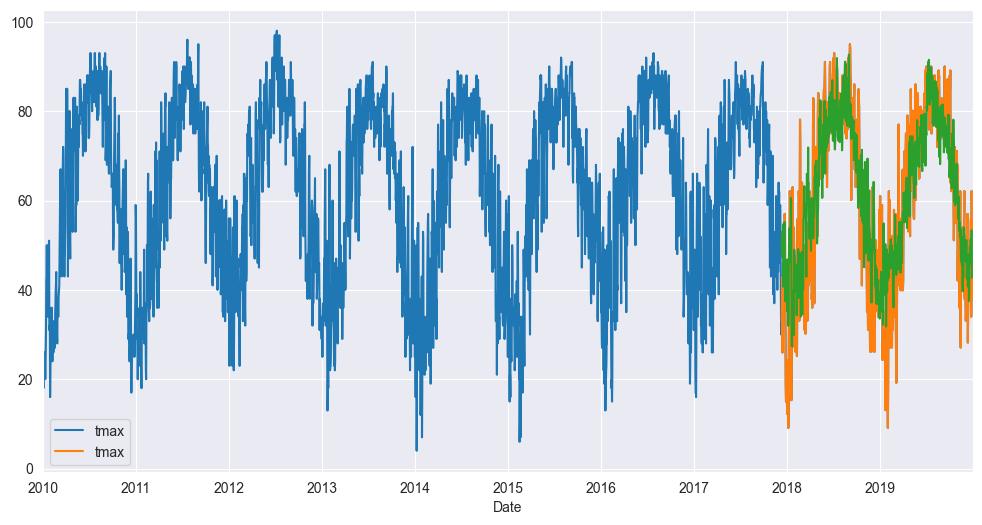

In [5]:
#plotting

sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure', figsize=(12,6))
fig, ax = plt.subplots()
ax = pitt_df.plot(ax=ax) 

model = AutoReg(pitt_df['tmax'], 30)
model_fit = model.fit()
len(pitt_df)


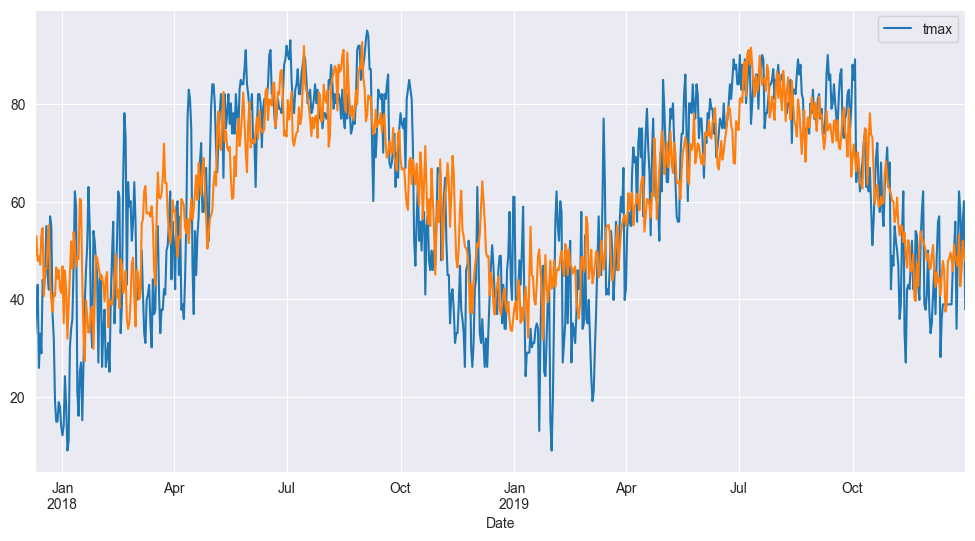

In [6]:
fig, ax = plt.subplots()

train_df = pitt_df.iloc[:2900]
test_df = pitt_df[2900:]

train_model = AutoReg(train_df['tmax'], 730).fit(cov_type = "HC0")
start = len(train_df)
end = len(train_df) + len(test_df) - 1 #subtracting 1 because it starts at 0

prediction = train_model.predict(start=start, end=end, dynamic=True)
ax = test_df.plot(ax=ax)
ax = prediction.plot(ax=ax)